---

# <center> ★ AI / ML Project - UBER Fare Prediction ★

---

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/Uber1.jpg" style="width: 600px;"/>

---

### Description:

The project is about on world's largest taxi company Uber inc. In this project, we're looking to predict the fare for their future transactional cases. Uber delivers service to lakhs of customers daily. Now it becomes really important to manage their data properly to come up with new business ideas to get best results. Eventually, it becomes really important to estimate the fare prices accurately.

The datset contains the following fields:
* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

### Acknowledgement:
The dataset is referred from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the fare price of uber ride.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

## <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [ ]:
#Importing the basic librarires

import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import math
import operator

import geopy.distance
from tqdm import tqdm
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the dataset

df = pd.read_csv('/content/drive/MyDrive/Statitics/uber_dataset.csv')

df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
display(df.head())

target = 'fare_amount'
features = [i for i in df.columns if i not in [target]]

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,1
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,1



Inference: The Datset consists of 7 features & 200000 samples.


In [ ]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
df.dropna(inplace=True)

                   Total Null Values  Percentage
fare_amount                        0         0.0
pickup_datetime                    0         0.0
pickup_longitude                   0         0.0
pickup_latitude                    0         0.0
passenger_count                    0         0.0
dropoff_longitude                  1         0.0
dropoff_latitude                   1         0.0


In [ ]:
# Reframing the columns

df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
df['Hourly_Segments'] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

df['Distance']=[round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]

df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

original_df = df.copy(deep=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,1,2014,3,Q3,H5,4483.73


In [ ]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199987 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199987 non-null  float64
 1   pickup_longitude   199987 non-null  float64
 2   pickup_latitude    199987 non-null  float64
 3   dropoff_longitude  199987 non-null  float64
 4   dropoff_latitude   199987 non-null  float64
 5   passenger_count    199987 non-null  int64  
 6   year               199987 non-null  int64  
 7   weekday            199987 non-null  int64  
 8   Monthly_Quarter    199987 non-null  object 
 9   Hourly_Segments    199987 non-null  object 
 10  Distance           199987 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 22.3+ MB


In [ ]:
df = df[df.Distance > 0]
df
df=df[(df.fare_amount != 499)&(df.fare_amount > 0)]
df.index = range(len(df))
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,1,2014,3,Q3,H5,4483.73
...,...,...,...,...,...,...,...,...,...,...,...
194329,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,6,Q4,H3,112.13
194330,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,4,Q1,H1,1879.64
194331,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,0,Q2,H1,12867.92
194332,14.5,-73.997124,40.725452,-73.983215,40.695416,1,2015,2,Q2,H4,3536.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194334 entries, 0 to 194333
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        194334 non-null  float64
 1   pickup_longitude   194334 non-null  float64
 2   pickup_latitude    194334 non-null  float64
 3   dropoff_longitude  194334 non-null  float64
 4   dropoff_latitude   194334 non-null  float64
 5   passenger_count    194334 non-null  int64  
 6   year               194334 non-null  int64  
 7   weekday            194334 non-null  int64  
 8   Monthly_Quarter    194334 non-null  object 
 9   Hourly_Segments    194334 non-null  object 
 10  Distance           194334 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 16.3+ MB


In [ ]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Monthly_Quarter           4
Hourly_Segments           6
passenger_count           7
year                      7
weekday                   7
fare_amount            1196
pickup_longitude      70423
dropoff_longitude     76248
pickup_latitude       83218
dropoff_latitude      89965
Distance             164534
dtype: int64

In [ ]:
#Checking number of unique rows in each feature

nu = df.drop([target], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.drop([target], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


In [ ]:
#Checking the stats of all the columns

display(df.describe())

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,194334.000000,194334.000000,194334.000000,194334.000000,194334.000000,194334.000000,194334.000000,194334.000000,1.943340e+05
mean,11.353461,-73.826635,40.646955,-73.837502,40.651588,1.683010,2011.747219,3.048586,2.107218e+04
std,9.685586,3.659970,2.930992,3.535783,2.899473,1.306617,1.860044,1.946725,3.841299e+05
min,0.010000,-93.824668,-74.015515,-75.458979,-74.015750,0.000000,2009.000000,0.000000,8.000000e-02
25%,6.000000,-73.992270,40.736346,-73.991590,40.735214,1.000000,2010.000000,1.000000,1.282237e+03
50%,8.500000,-73.982114,40.753248,-73.980537,40.753705,1.000000,2012.000000,3.000000,2.184675e+03
75%,12.500000,-73.968392,40.767507,-73.965408,40.768312,2.000000,2013.000000,5.000000,3.958560e+03
max,230.000000,40.808425,48.018760,40.831932,45.031598,6.000000,2015.000000,6.000000,8.783594e+06


In [ ]:
df_sample=df[100:200]
df_sample.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Distance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,10.358400,-73.237700,40.346541,-73.235744,40.346661,1.050000,2011.71000,2.630000,3124.202100
std,7.171687,7.397999,4.074740,7.397693,4.074946,0.411329,1.99137,1.801543,3212.002383
min,3.300000,-74.015122,0.007380,-74.010750,0.005670,1.000000,2009.00000,0.000000,214.350000
25%,6.100000,-73.993249,40.741138,-73.989310,40.737560,1.000000,2010.00000,1.000000,1310.300000
50%,8.100000,-73.983427,40.755163,-73.978799,40.751232,1.000000,2012.00000,2.000000,2078.335000
75%,11.750000,-73.971236,40.766697,-73.965875,40.769523,1.000000,2013.00000,4.000000,3589.957500
max,45.000000,0.001782,40.806353,0.000875,40.893366,5.000000,2015.00000,6.000000,20090.160000


In [ ]:
hr = df[['fare_amount', 'Distance']]
hr
hr=hr.sort_values(by=['Distance'], ascending=False)
hr

,fare_amount,Distance
63770,4.1,8783593.50
33626,49.8,8776815.28
136628,6.1,8708242.63
160605,58.6,8681513.65
141412,53.1,8681268.31
...,...,...
193209,2.5,0.08
193031,52.0,0.08
158486,45.0,0.08
41552,2.5,0.08


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

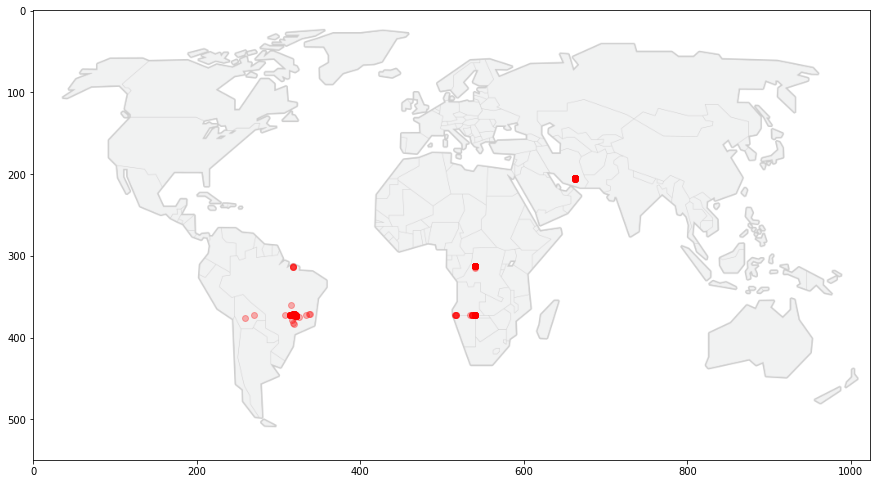

In [ ]:
plt.figure(figsize=[15,10])
a=plt.imread('https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/wm.png')
plt.imshow(a, alpha=0.2)
plt.scatter( (df.pickup_longitude+180)*3,(df.pickup_latitude+215)*1.45555555,alpha=0.3, color='red')
#mdf.plot(kind='scatter',x='pickup_latitude',y='pickup_longitude',alpha=0.1)
plt.show()

<Figure size 576x288 with 0 Axes>

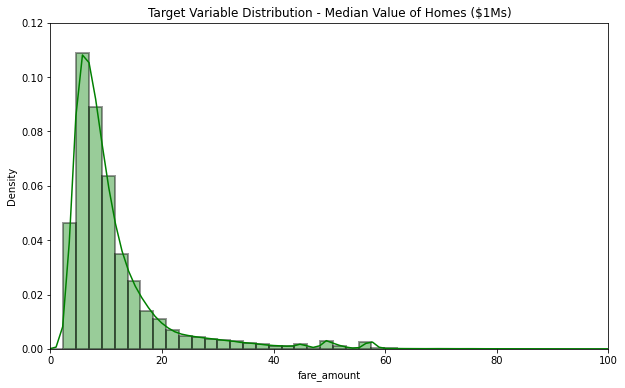

In [ ]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
fig, ax = plt.subplots()
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=100,ax=ax)
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.12)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

In [ ]:
#distance

<Figure size 576x288 with 0 Axes>

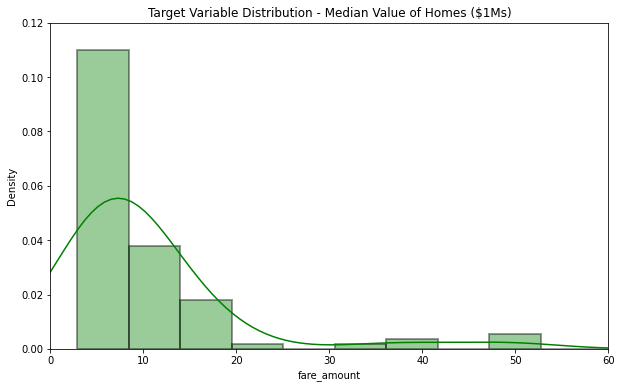

In [ ]:
#df_sample=df[1950:2050]
plt.figure(figsize=[8,4])
fig, ax = plt.subplots()
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=20,ax=ax)
ax.set_xlim(0, 60)
ax.set_ylim(0, 0.12)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

<Figure size 576x288 with 0 Axes>

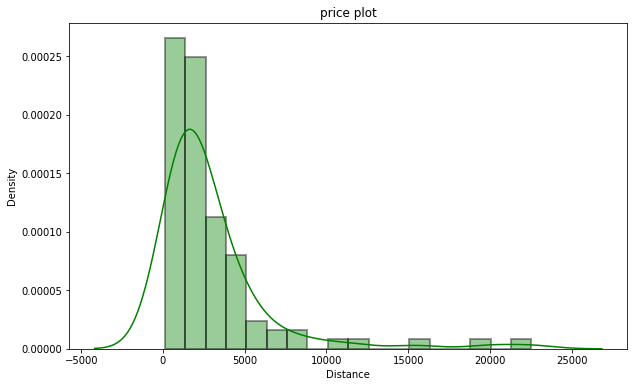

In [ ]:

plt.figure(figsize=[8,4])
fig, ax = plt.subplots()
sns.distplot(df_sample['Distance'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=18,ax=ax)
plt.title('price plot')
plt.show()

In [ ]:
df_sample['Distance'].mean()

90302.7573

In [ ]:
df_sample['Distance'].std()

866126.7234574691

In [ ]:
# #Removal of any Duplicate rows (if any)

# counter = 0
# rs,cs = df_sample.shape

# df_sample.drop_duplicates(inplace=True)
# df_sample.drop(['pickup_latitude','pickup_longitude',
#          'dropoff_latitude','dropoff_longitude'],axis=1)

# if df_sample.shape==(rs,cs):
#     print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
# else:
#     print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df_sample.shape[0]}')

In [ ]:
df_sample_hrhk=df_sample[df_sample['Distance']<10000]
df_sample_hrhk=df_sample[df_sample['fare_amount']<12.5]
df_sample_hrhk.shape

(77, 11)

<Figure size 504x504 with 0 Axes>

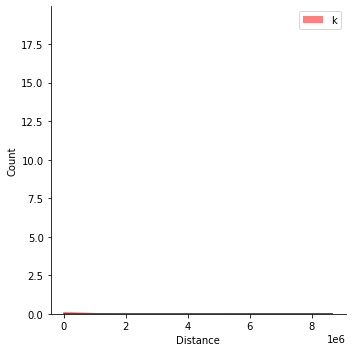

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.displot(df_sample_hrhk['Distance'], color='red',label='k', kde=True)
plt.legend();

**Inference:**The Target Variable seems to be be highly skewed, with most datapoints lying near 0.

                               Visualising Categorical Features:                                


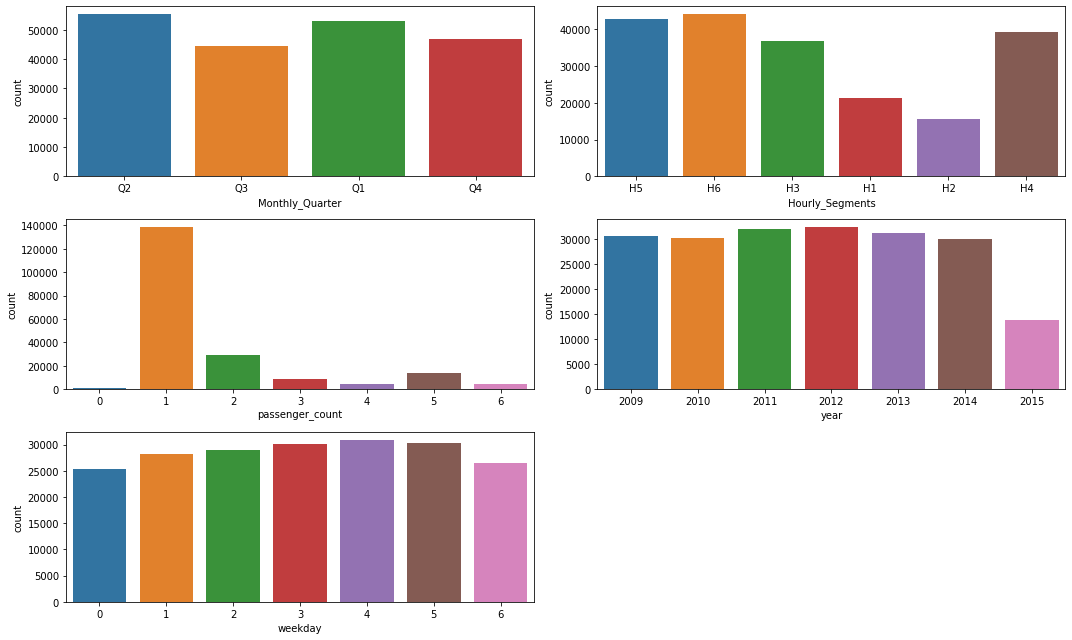

In [ ]:
#Visualising the categorical features

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=4:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(math.ceil(len(cf)/2),2,i)
#         sns.countplot(df[cf[i]])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(df[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])

plt.tight_layout()
plt.show()

Confidence Interval for passenger_count

In [ ]:

import scipy.stats as st

df_sample_CI=df[100:500]
sample_CI=df_sample_CI['passenger_count']
print("Sample's confidence interval for count")
# create 99% confidence interval
st.t.interval(alpha=0.99, df=len(sample_CI)-1,
              loc=np.mean(sample_CI),
              scale=st.sem(sample_CI))

Sample's confidence interval for count


(1.309995810497734, 1.5900041895022659)

In [ ]:
population_CI=df['passenger_count']
print("population's confidence interval for count")
# create 99% confidence interval
st.t.interval(alpha=0.99, df=len(population_CI)-1,
              loc=np.mean(population_CI),
              scale=st.sem(population_CI))

population's confidence interval for count


(1.6752292539305431, 1.6902795041387315)

Confidence Interval for Distance

In [ ]:
Distance_Population_CI=df['Distance']
print("population's confidence interval for distance")
# create 99% confidence interval
st.t.interval(alpha=0.99, df=len(Distance_Population_CI)-1,
              loc=np.mean(Distance_Population_CI),
              scale=st.sem(Distance_Population_CI))

population's confidence interval for distance


(18376.61186036269, 22750.31672479534)

In [ ]:
df_sample_CI=df[20010:20110]
Distance_sample_CI=df_sample_CI['Distance']
print("Sample's confidence interval for distnace")
# create 99% confidence interval
st.t.interval(alpha=0.99, df=len(Distance_sample_CI)-1,
              loc=np.mean(Distance_sample_CI),
              scale=st.sem(Distance_sample_CI))

Sample's confidence interval for distnace


(2821.431180874625, 5359.758219125374)

**Inference:** The categorical features distribution can be seen in the above plots.

                                 Numeric Features Distribution                                  


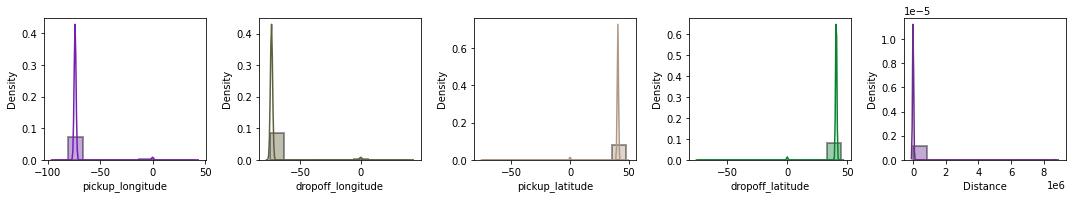

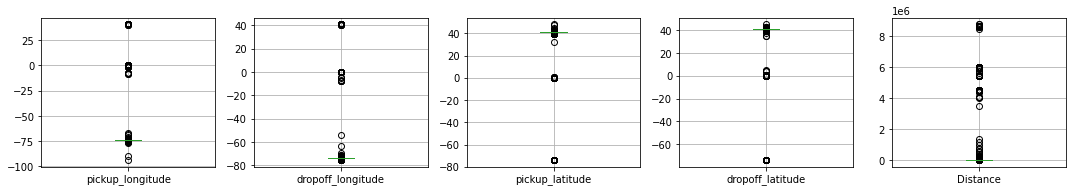

In [ ]:
#Visualising the numeric features

print('\033[1mNumeric Features Distribution'.center(100))

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

In [ ]:
# #Understanding the relationship between all the features

# g = sns.pairplot(df)
# plt.title('Pairplots for all the Feature')
# #g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [ ]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)
df.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')



Inference: Number of duplicates dropped/fixed ---> 5653


In [ ]:
# Since only one pair of values are missing in the dataset, we can just drop them

# df.dropna(inplace=True)

In [ ]:
#Converting categorical Columns to Numeric

df1 = df.copy()
df3 = df1.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)

print(df3.shape)
df3.columns


Dummy Encoding on features:
Monthly_Quarter
Hourly_Segments
passenger_count
year
weekday
(194334, 32)


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'Distance',
       'Monthly_Quarter_Q2', 'Monthly_Quarter_Q3', 'Monthly_Quarter_Q4',
       'Hourly_Segments_H2', 'Hourly_Segments_H3', 'Hourly_Segments_H4',
       'Hourly_Segments_H5', 'Hourly_Segments_H6', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'year_2015', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [ ]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2012,year_2013,year_2014,year_2015,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1681.11,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2454.36,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5039.60,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1661.44,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.7,-73.975187,40.745767,-74.002720,40.743537,2338.56,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0



Inference:
Before removal of outliers, The dataset had 194334 samples.
After removal of outliers, The dataset now has 161629 samples.


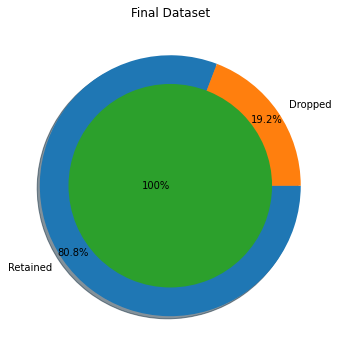


Inference: After the cleanup process, 38358 samples were dropped,which is 19.18% of the data.


In [ ]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped,which is {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

Linear Regression

In [ ]:
hk=df[11600:11700]
# hk
# hk = hk[['fare_amount', 'Distance']]
# hk

In [ ]:
hkr = hk[hk.Distance != 0]
hkr = hk[hk.fare_amount != 49.57]
hkr
hkr=hkr[(hkr.fare_amount != 499)&(hkr.fare_amount > 0)]
hkr.index = range(len(hkr))
hkr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,year_2012,year_2013,year_2014,year_2015,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,7.5,-73.979213,40.753053,-73.991565,40.750012,1096.43,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,6.0,-73.985087,40.758924,-73.980935,40.759965,369.16,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,4.5,-73.965885,40.762393,-73.955178,40.764755,941.33,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,5.5,-73.992264,40.761574,-74.000732,40.746162,1854.83,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,12.0,-73.977287,40.754337,-73.992005,40.744087,1685.42,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.0,-73.979942,40.767349,-73.979383,40.773234,655.23,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
96,8.7,-73.957374,40.770340,-73.976112,40.759991,1955.46,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
97,18.5,-73.980430,40.765173,-74.000371,40.730481,4204.53,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
98,6.5,-73.985667,40.756045,-74.002072,40.739562,2295.65,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
def linear_regression(x, y):
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den

    B0 = y_mean - (B1*x_mean)

    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))

    return (B0, B1, reg_line)

In [ ]:
def corr_coef(x, y):
    N = len(x)

    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [ ]:
X = df_sample_hrhk['Distance']
Y = df_sample_hrhk['fare_amount']


In [ ]:
#hrhk
df_sample_hrhk
df_sample_hrhk = df_sample_hrhk[df_sample_hrhk.fare_amount != 49.57]
df_sample_hrhk.index = range(len(df_sample_hrhk))
df_sample_hrhk

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,8.0,-73.978541,40.729726,-73.981402,40.747024,1,2013,6,Q3,H5,1936.06
1,6.9,-73.989893,40.729512,-73.974745,40.750999,1,2009,3,Q3,H6,2707.50
2,9.3,-74.004685,40.740665,-73.985490,40.727663,5,2010,1,Q4,H3,2171.13
3,10.5,-73.991102,40.747002,-73.978010,40.751272,1,2013,4,Q4,H3,1203.05
4,9.7,-73.970680,40.764838,-73.986768,40.735632,4,2009,1,Q2,H6,3516.38
...,...,...,...,...,...,...,...,...,...,...,...
70,9.0,-73.999823,40.737893,-73.983522,40.725121,1,2009,5,Q1,H6,1976.83
71,7.3,-73.981381,40.728997,-73.976731,40.751827,2,2010,1,Q1,H6,2565.49
72,9.5,-74.006099,40.750108,-74.007857,40.732269,2,2014,2,Q4,H5,1986.56
73,10.5,-73.986042,40.747307,-73.969046,40.768513,1,2011,2,Q1,H4,2757.78


In [ ]:
B0, B1, reg_line = linear_regression(X, Y)
print('Regression Line: ', reg_line)
R = corr_coef(X, Y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 5.179322090199585 + 0.001β
Correlation Coef.:  0.48098083471064007
"Goodness of Fit":  0.23134256335894407


In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(X, Y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(X.mean(), 2),
                       round(Y.mean(), 2),
                       round(R, 4),
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=1000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How price increases with distance')
plt.xlabel('distance', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.plot(X, B0 + B1*X, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=X.mean(), y=Y.mean(), marker='*', s=10**2.5, c='r') # average point

Estimated coefficients are :
b_0 = 3.5107642891088284 \  
b_1 = 0.002550880603718087


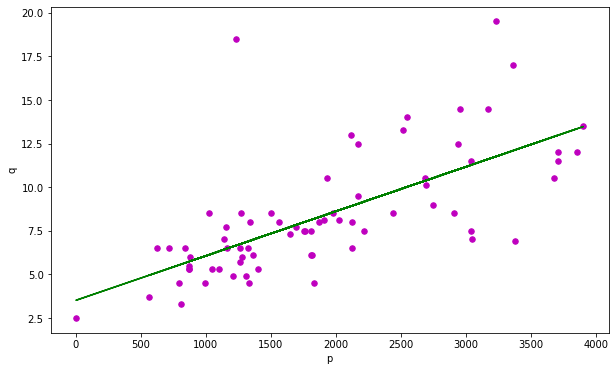

In [ ]:
import numpy as nmp
import matplotlib.pyplot as mtplt

def estimate_coeff(p, q):
# Here, we will estimate the total number of points or observation
    n1 = nmp.size(p)
# Now, we will calculate the mean of a and b vector
    m_p = nmp.mean(p)
    m_q = nmp.mean(q)

# here, we will calculate the cross deviation and deviation about a
    SS_pq = nmp.sum(q * p) - n1 * m_q * m_p
    SS_pp = nmp.sum(p * p) - n1 * m_p * m_p

# here, we will calculate the regression coefficients
    b_1 = SS_pq / SS_pp
    b_0 = m_q - b_1 * m_p

    return (b_0, b_1)

def plot_regression_line(p, q, b):
# Now, we will plot the actual points or observation as scatter plot
    mtplt.scatter(p, q, color = "m",
            marker = "o", s = 30)

# here, we will calculate the predicted response vector
    q_pred = b[0] + b[1] * p

# here, we will plot the regression line
    mtplt.plot(p, q_pred, color = "g")

# here, we will put the labels
    mtplt.xlabel('p')
    mtplt.ylabel('q')

# here, we will define the function to show plot
    mtplt.show()



p = df_sample_hrhk['Distance']
q = df_sample_hrhk['fare_amount']

# now, we will estimate the coefficients
b = estimate_coeff(p, q)
print("Estimated coefficients are :\nb_0 = {} \  \nb_1 = {}".format(b[0], b[1]))

# Now, we will plot the regression line
plot_regression_line(p, q, b)

CONFIDENCE INTERVAL--


In [ ]:
import math
hkci=df[0:100]
mean_price = hkci['fare_amount'].mean()
print("mean is ",mean_price)
sd_price = hkci['fare_amount'].std()
print("sd is ",sd_price)
sample_n=100
root_n= math.sqrt(sample_n)
Z_alphaby2=1.96
num = Z_alphaby2*(sd_price/root_n)
LI= mean_price - num
RI=mean_price + num
CI= [LI, RI]
print("confidence interval is ",CI)

mean is  8.693999999999999
sd is  4.386084975709136
confidence interval is  [7.834327344761008, 9.553672655238989]


In [ ]:

hkci=df[0:100]
mean_price = hkci['Distance'].mean()
print("mean is ",mean_price)
sd_price = hkci['Distance'].std()
print("sd is ",sd_price)
sample_n=100
root_n= math.sqrt(sample_n)
Z_alphaby2=1.96
num = Z_alphaby2*(sd_price/root_n)
LI= mean_price - num
RI=mean_price + num
CI= [LI, RI]
print("confidence interval is ",CI)

mean is  2250.8723999999997
sd is  1468.252320797592
confidence interval is  [1963.0949451236718, 2538.649854876328]


---

# <center> 4. Data Manipulation

In [ ]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))

df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (163203, 31) (163203,) 
Training set  --->  (130562, 31) (130562,) 
Testing set   --->  (32641, 31)  (32641,)


DATA STANDARDISATION -
https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [ ]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,...,year_2012,year_2013,year_2014,year_2015,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,...,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05,1.305620e+05
mean,-5.369477e-13,2.100717e-14,6.277726e-13,4.201440e-13,1.980956e-17,3.570074e-17,-1.414968e-17,6.312936e-18,6.639467e-17,4.767355e-17,...,4.511572e-17,-2.176875e-19,-8.032667e-17,5.638105e-17,9.317023e-17,-1.061226e-16,-2.323814e-17,2.634018e-17,-2.019051e-17,6.530624e-19
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.961437e+00,-2.897556e+00,-2.919757e+00,-2.867446e+00,-1.622863e+00,-6.155085e-01,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.374685e-01,-4.281254e-01,-4.167818e-01,-2.720636e-01,-4.096554e-01,-4.143359e-01,-4.226637e-01,-4.292020e-01,-4.216941e-01,-3.801548e-01
25%,-6.783829e-01,-6.847366e-01,-6.710310e-01,-6.636110e-01,-7.629052e-01,-6.155085e-01,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.374685e-01,-4.281254e-01,-4.167818e-01,-2.720636e-01,-4.096554e-01,-4.143359e-01,-4.226637e-01,-4.292020e-01,-4.216941e-01,-3.801548e-01
50%,-6.341797e-02,3.271920e-02,-6.532058e-02,4.834418e-02,-2.347775e-01,-6.155085e-01,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.374685e-01,-4.281254e-01,-4.167818e-01,-2.720636e-01,-4.096554e-01,-4.143359e-01,-4.226637e-01,-4.292020e-01,-4.216941e-01,-3.801548e-01
75%,6.429738e-01,6.539808e-01,6.174684e-01,6.350862e-01,5.652279e-01,1.624673e+00,-5.316226e-01,-5.558634e-01,-2.767434e-01,-4.873355e-01,...,-4.374685e-01,-4.281254e-01,-4.167818e-01,-2.720636e-01,-4.096554e-01,-4.143359e-01,-4.226637e-01,-4.292020e-01,-4.216941e-01,-3.801548e-01
max,3.255964e+00,2.807711e+00,3.137233e+00,2.805374e+00,2.933357e+00,1.624673e+00,1.881034e+00,1.799003e+00,3.613456e+00,2.051975e+00,...,2.285879e+00,2.335764e+00,2.399337e+00,3.675611e+00,2.441076e+00,2.413501e+00,2.365947e+00,2.329905e+00,2.371387e+00,2.630507e+00



                                Standardardization on Testing set                                


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,...,year_2012,year_2013,year_2014,year_2015,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,...,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000,32641.000000
mean,0.009496,0.003957,0.002645,0.010718,0.003829,-0.004419,0.008474,-0.004463,0.001664,0.002463,...,-0.001529,0.001602,0.005796,-0.000427,-0.003805,0.002289,-0.002164,-0.001824,0.000336,-0.000882
std,1.002215,1.000929,0.993715,1.001776,1.001768,0.997773,1.005681,0.997227,1.002787,1.001937,...,0.998600,1.001541,1.005727,0.999288,0.996135,1.002299,0.997908,0.998279,1.000343,0.999022
min,-2.708732,-2.887521,-2.876670,-2.857408,-1.622863,-0.615509,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.437469,-0.428125,-0.416782,-0.272064,-0.409655,-0.414336,-0.422664,-0.429202,-0.421694,-0.380155
25%,-0.674309,-0.688962,-0.664415,-0.652657,-0.762707,-0.615509,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.437469,-0.428125,-0.416782,-0.272064,-0.409655,-0.414336,-0.422664,-0.429202,-0.421694,-0.380155
50%,-0.048188,0.048564,-0.060663,0.060627,-0.230528,-0.615509,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.437469,-0.428125,-0.416782,-0.272064,-0.409655,-0.414336,-0.422664,-0.429202,-0.421694,-0.380155
75%,0.653268,0.661489,0.621690,0.657956,0.574644,1.624673,-0.531623,-0.555863,-0.276743,-0.487335,...,-0.437469,-0.428125,-0.416782,-0.272064,-0.409655,-0.414336,-0.422664,-0.429202,-0.421694,-0.380155
max,3.252830,2.800652,3.132185,2.804325,2.932838,1.624673,1.881034,1.799003,3.613456,2.051975,...,2.285879,2.335764,2.399337,3.675611,2.441076,2.413501,2.365947,2.329905,2.371387,2.630507


---

# <center> 5. Feature Selection/Extraction

                                       Correlation Matrix                                       


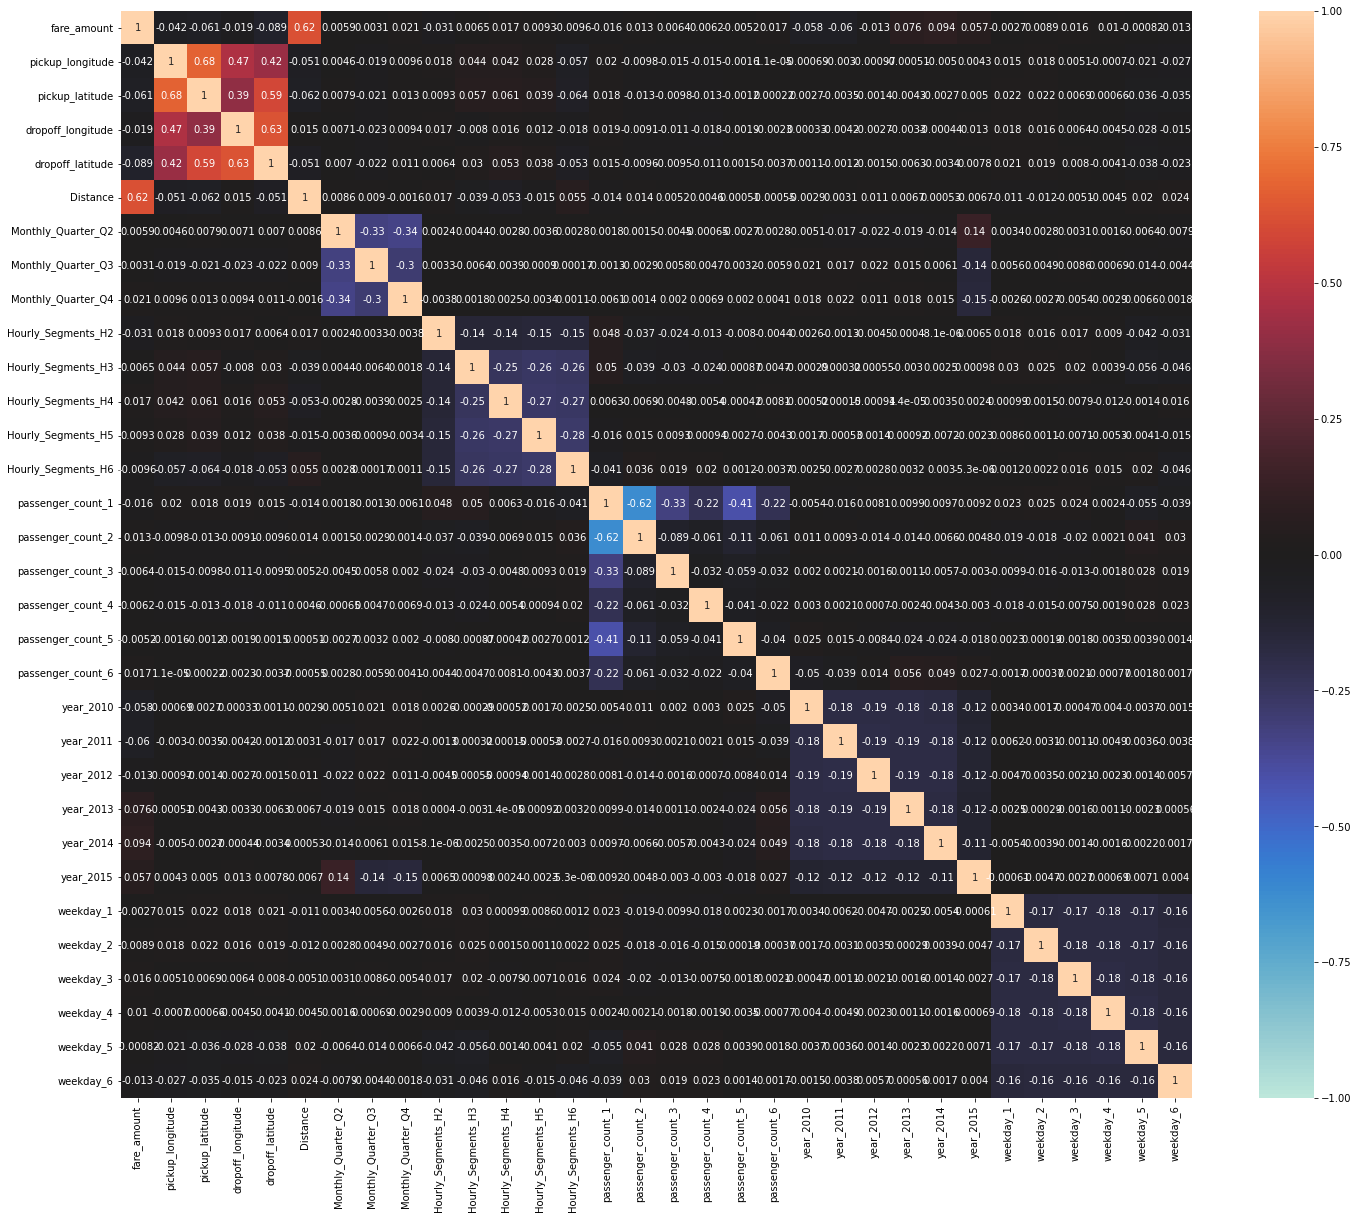

In [ ]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [ ]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     3547.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        08:13:38   Log-Likelihood:            -3.3661e+05
No. Observations:              130562   AIC:                         6.733e+05
Df Residuals:                  130530   BIC:                         6.736e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1039.0096     85.749     12.117      0.000     870.943    1207.076
pickup_longitude       0.7655      0.802      0.954      0.340      -0.806       2.338
pickup_latitude        1.0992      0.663      1.658      0.097      -0.200       2.399
dropoff_longitude      4.5006      0.729      6.170      0.000       3.071       5.930
dropoff_latitude     -16.9837      0.604    -28.123      0.000     -18.167     -15.800
Distance               0.0021    6.6e-06    314.197      0.000       0.002       0.002
Monthly_Quarter_Q2     0.1479      0.024      6.175      0.000       0.101       0.195
Monthly_Quarter_Q3     0.3185      0.026     12.348      0.000       0.268       0.369
Monthly_Quarter_Q4     0.5200      0.025     20.534      0.000       0.470       0.570
Hourly_Segments_H2    -0.2480      0.045     -5.563      0.000      -0.335      -0.161
Hourly_Segments_H3     0.8036      0.036     22.246      0.000       0.733       0.874
Hourly_Segments_H4     0.9937      0.035     28.004      0.000       0.924       1.063
Hourly_Segments_H5     0.7011      0.035     20.016      0.000       0.632       0.770
Hourly_Segments_H6     0.0872      0.035      2.495      0.013       0.019       0.156
passenger_count_1      0.2151      0.148      1.451      0.147      -0.075       0.506
passenger_count_2      0.3691      0.150      2.466      0.014       0.076       0.662
passenger_count_3      0.3960      0.154      2.578      0.010       0.095       0.697
passenger_count_4      0.4760      0.160      2.981      0.003       0.163       0.789
passenger_count_5      0.3240      0.152      2.138      0.033       0.027       0.621
passenger_count_6      0.2355      0.160      1.470      0.142      -0.078       0.550
year_2010              0.1199      0.032      3.768      0.000       0.058       0.182
year_2011              0.0771      0.032      2.445      0.015       0.015       0.139
year_2012              0.5323      0.031     16.913      0.000       0.471       0.594
year_2013              1.4822      0.032     46.623      0.000       1.420       1.544
year_2014              1.7470      0.032     54.333      0.000       1.684       1.810
year_2015              1.9043      0.041     45.910      0.000       1.823       1.986
weekday_1              0.2493      0.034      7.312      0.000       0.182       0.316
weekday_2              0.3675      0.034     10.824      0.000       0.301       0.434
weekday_3              0.4200      0.034     12.465      0.000       0.354       0.486
weekday_4              0.3504      0.034     10.453      0.000       0.285       0.416
weekday_5              0.0498      0.034      1.465      0.143      -0.017       0.116
weekday_6             -0.1685      0.036     -4.732      0.000      -0.238      -0.099
======================================

 ---

**Inference:**
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

(2.962098014195961, 4.837901985804038)

KeyError: ignored

## 5a. Manual Method - VIF

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in tqdm(range(len(Train_X_std.columns)-1)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in tqdm(range(m)):
    lm = LinearRegression()
    #lm.fit(Train_X_std, Train_Y)

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    #print(Train_X_std.shape[1]-i)

    #Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
    #a = Train_xy.columns.values.tolist()
    #a.remove(target)

    #API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
    #DROP.append(vif.loc[0][0])
    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    #print(Train_X_std.loc[:,rfe.support_].columns)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in tqdm(range(m)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)

    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

#### Inference:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most  features using manual RFE Technique.

In [ ]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=df.shape[1]-23)
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

---

# <center> 6. Predictive Modelling

In [ ]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>50].columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')
    plt.xlabel('Errors')

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/mr.png" style="width: 600px;float: left;"/>

In [ ]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/ridge.png" style="width: 500px;float: left;"/>

In [ ]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/lasso.png" style="width: 500px;float: left;"/>

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/en.png" style="width: 500px;float: left;"/>

In [ ]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/pn.png" style="width: 500px;float: left;"/>

In [ ]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=6

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)

    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))

    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([3,4.1])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 5th order polynomial regression as it gives the optimal training & testing scores...

In [ ]:
#Using the 5th Order Polynomial Regression model (degree=5)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [ ]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

In [ ]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

In [ ]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
# baxes = brokenaxes(ylims=((0,4),(524,532)))
# baxes.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
# baxes.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
# for index, value in enumerate(Model_Evaluation_Comparison_Matrix[cc[-2]].values):
#     plt.text(round(value,2), index, str(round(value,2)))
# for index, value in enumerate(Model_Evaluation_Comparison_Matrix[cc[-1]].values):
#     plt.text(round(value,2), index, str(round(value,2)))
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation=35)
plt.legend()
#plt.ylim([0,10])
plt.show()

**Inference:** The complex models like polynomial (degree-5) performs the best on the current dataset.
For this problem, it is can be said that even simple regression can be a good choice to go with...

---

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was large enough totalling 2M samples & after preprocessing 18.4% of the datasamples were dropped.
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-5) was the best choise, yet it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.

In [ ]:
#<<<--------------------------------------THE END-------------------------------------------------->>>